# Plot de produtividade

Neste plot eu tento resumir a minha percepção sobre a produtividade comparativa entre um trabalho manual e o mesmo trabalho que foi realizado programaticamente. O trabalho manual (linhas cheias) é comparado com o trabalho automatizado (linhas tracejadas), em duas situações.

Primeiro, onde o trabalho está sendo realizado pela primeira vez (azul). Há um tempo de latência para tanto a tarefa manual quanto a automatizada, e depois a produtividade cresce com o tempo. Esse tempo de latência se refere àquele período em que você está entendendo o problema ainda. Como exemplo de tarefas do tempo de latência, temos: como abrir os arquivos, como tratar, que modelos utilizar. Geralmente, esse tempo de latência é maior para uma tarefa programática que manual pela complexidade inerente da programação.

Se o trabalho precisa ser re-feito sob outros parâmetros (erro inicial, ou outro conjunto de dados), o tempo de latência é muito menor em ambos os casos. Aqui, presumiu-se que não foi necessário re-lembrar o procedimento. Note que esta tarefa é tão mais difícil quanto mais tempo se passou (vide curva de esquecimento de Ebbinghaus). E em metodologias de tratamento intrinsecamente não-lineares (Excel, Origin), o tempo de latência pode ser muito grande comparado a uma metodologia geralmente linear (scripts).

Uma tarefa de baixo volume (curva pontilhada em roxo), não é beneficiada pela automatização, pois a linha pontilhada cruza a linha contínua azul antes da linha tracejada. Porém, se a tarefa precisa ser re-feita (curvas laranja), isso se inverte. Caso o volume de tratamento seja maior ainda, no caso da linha pontilhada magenta, utilizar a programação é benéfico em qualquer situação, no sentido de gasto de tempo.

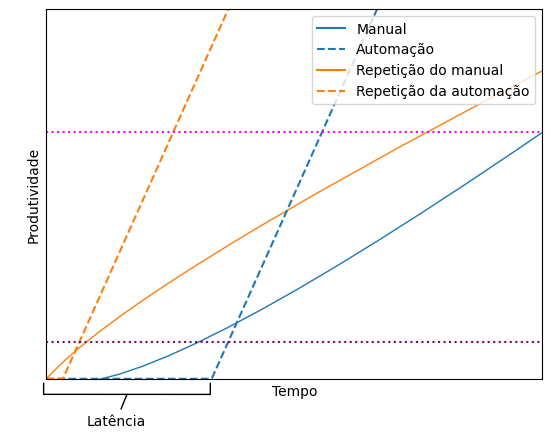

In [6]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.path as mpath
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D

x = np.linspace(0, 10, num=1000)
y_auto = np.clip(3 * (x - 1), 0, np.inf)
y_repeat = np.clip(3 * (x - 0.1), 0, np.inf)

fig, ax = plt.subplots()

# Criando curvas de Bezier para exemplificar a execução manual
Path = mpath.Path

pts_manual = matplotlib.bezier.find_control_points(0, 0, 1, 0.35, 3, 2)
manual1 = mpatches.PathPatch(
    Path(pts_manual, [Path.MOVETO, Path.CURVE3, Path.CURVE3]),
    fc='None', ec='C0', transform=ax.transData
)

pts_manual_repeat = matplotlib.bezier.find_control_points(0, 0, 1, 1, 3, 2.5)
manual2 = mpatches.PathPatch(
    Path(pts_manual_repeat, [Path.MOVETO, Path.CURVE3, Path.CURVE3]),
    fc='None', ec='C1', transform=ax.transData
)

# Adicionando as curvas no eixo

p1 = ax.add_patch(manual1)
p2 = ax.add_patch(manual2)
p3 = ax.plot(x, y_auto, c='C0', label='Automação', ls='--')
p4 = ax.plot(x, y_repeat, c='C1', label='Repetição da automação', ls='--')

# Configurando eixos
ax.set_ylim(-0, 3)
ax.set_xlim(0, 3)
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlabel('Tempo')
ax.set_ylabel('Produtividade')

# Criando a legenda
p_manual = Line2D([0, 1], [0, 1], c='C0')
p_manual_repeat = Line2D([0, 1], [0, 1], c='C1')

ax.legend(
    [p_manual, p3[0], p_manual_repeat, p4[0]],
    ["Manual", "Automação", "Repetição do manual", "Repetição da automação"],
    loc='upper right',
)

# Adicionando texto e indicação de "Latência"
ax.annotate(
    'Latência', 
    xy=(0.2, 0.09),
    xytext=(0.135, 0.02),
    xycoords='figure fraction', 
    arrowprops=dict(arrowstyle='-[, widthB=6, angleB=22, lengthB=0.8')
)

# Adicionando exemplos de produtividade
ax.axhline(0.3, c='purple', ls=':')
ax.axhline(2, c='magenta', ls=':')

fig.savefig('imagens/produtividade.png', bbox_inches='tight')